# CryptoCompare API

In [1]:
import requests
import datetime
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
from pylab import rcParams

## Current Price

In [3]:
def price(symbol, comparison_symbols=['USD'], exchange=''):
    url = 'https://min-api.cryptocompare.com/data/price?fsym={}&tsyms={}'\
            .format(symbol.upper(), ','.join(comparison_symbols).upper())
    if exchange:
        url += '&e={}'.format(exchange)
    page = requests.get(url)
    data = page.json()
    return data

In [4]:
price('BTC', exchange='Coinbase')

{'USD': 3412.01}

In [5]:
price('NEO', ['BTC', 'ETH', 'USD'])

{'BTC': 0.00176, 'ETH': 0.06719, 'USD': 6.19}

## Historical Price by Minute

In [6]:
def minute_price_historical(symbol, comparison_symbol, limit, aggregate, exchange=''):
    url = 'https://min-api.cryptocompare.com/data/histominute?fsym={}&tsym={}&limit={}&aggregate={}'\
            .format(symbol.upper(), comparison_symbol.upper(), limit, aggregate)
    if exchange:
        url += '&e={}'.format(exchange)
    page = requests.get(url)
    data = page.json()['Data']
    df = pd.DataFrame(data)
    df['timestamp'] = [datetime.datetime.fromtimestamp(d) for d in df.time]
    return df

In [7]:
time_delta = 1 #in minutes (сhoose cryptocurrency and minutes intervsl)
df = minute_price_historical('BTC', 'USD', 30, time_delta)
print('Max length = %s' % len(df))
print('Max time = %s' % (df.timestamp.max() - df.timestamp.min()))

Max length = 31
Max time = 0 days 00:30:00


In [8]:
df.head()

,close,high,low,open,time,volumefrom,volumeto,timestamp
0,3473.27,3478.92,3473.27,3478.81,1544482800,97.18,337404.33,2018-12-11 01:00:00
1,3471.51,3473.27,3467.56,3473.27,1544482860,62.10,215725.86,2018-12-11 01:01:00
2,3469.56,3471.51,3467.79,3471.51,1544482920,39.09,136373.92,2018-12-11 01:02:00
3,3469.78,3470.36,3469.56,3469.56,1544482980,9.54,32987.90,2018-12-11 01:03:00
4,3469.73,3470.83,3469.57,3469.78,1544483040,11.60,41646.91,2018-12-11 01:04:00


In [10]:
df.tail()

,close,high,low,open,time,volumefrom,volumeto,timestamp
26,3471.44,3474.21,3471.44,3474.10,1544484360,27.74,95722.54,2018-12-11 01:26:00
27,3470.12,3472.28,3469.76,3471.44,1544484420,12.27,42303.74,2018-12-11 01:27:00
28,3467.98,3470.20,3466.93,3470.12,1544484480,41.38,141876.58,2018-12-11 01:28:00
29,3468.98,3469.53,3467.98,3467.98,1544484540,2.01,6943.71,2018-12-11 01:29:00
30,3465.75,3468.98,3465.75,3468.98,1544484600,0.00,0.00,2018-12-11 01:30:00


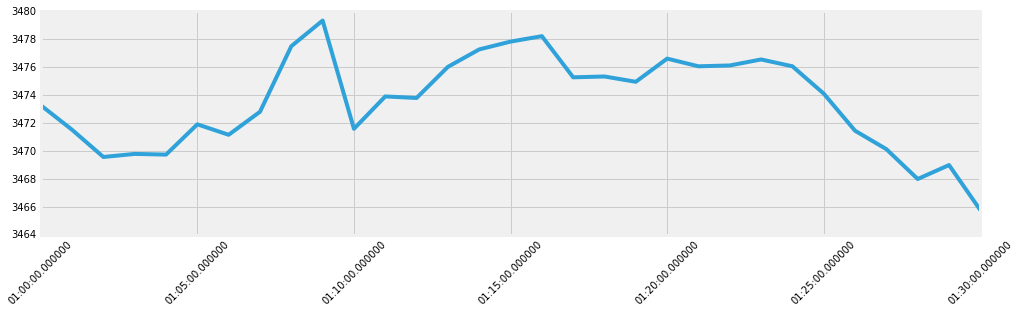

In [9]:
rcParams['figure.figsize'] = 15, 4
plt.plot(df.timestamp, df.close)
plt.xticks(rotation=45)
plt.show()